In [2]:
import pandas as pd

In [3]:
lemma_result = pd.read_csv("../Clean/lemma_result.csv") #Dataset

In [4]:
print(lemma_result.head())

                                      cleaned_review  Label
0  one reviewers mention watch 1 oz episode hook ...      1
1  wonderful little production film technique una...      1
2  think wonderful way spend time hot summer week...      1
3  basically family little boy jake think zombie ...      0
4  petter mattei love time money visually stun fi...      1


In [5]:
print(lemma_result.shape)

(1000, 2)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import train_test_split
import random
import re

In [7]:
max_fatures = 7000 #จำนวนคำที่ใช้ใน model
tokenizer = Tokenizer(num_words=max_fatures, split=' ') 
tokenizer.fit_on_texts(lemma_result['cleaned_review'].values)
X1 = tokenizer.texts_to_sequences(lemma_result['cleaned_review'].values)
X1 = pad_sequences(X1, padding='pre') # ลองปรับ padding เป็น Post เผื่อค่าจะดีขึ้น

In [8]:
Y1 = pd.get_dummies(lemma_result['Label']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, train_size = 0.8, random_state = 42 ) #ใส่ค่า test size กับ train size แล้วลองรันใหม่
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(800, 580) (800, 2)
(200, 580) (200, 2)


In [44]:
embed_dim = 150
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 580, 150)          1050000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 580, 150)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,331,001
Trainable params: 1,331,001
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
#Y1_train[:,0]

In [46]:
batch_size = 32
random.seed(10)
history = model.fit(X1_train, Y1_train[:,0],validation_split=0.2, epochs = 50, batch_size=batch_size, verbose = 2)

Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 - 40s - loss: 0.6905 - accuracy: 0.5562 - val_loss: 0.6836 - val_accuracy: 0.6313
Epoch 2/50
640/640 - 42s - loss: 0.6274 - accuracy: 0.8203 - val_loss: 0.5960 - val_accuracy: 0.7125
Epoch 3/50
640/640 - 36s - loss: 0.3479 - accuracy: 0.9297 - val_loss: 0.5894 - val_accuracy: 0.7063
Epoch 4/50
640/640 - 37s - loss: 0.1262 - accuracy: 0.9688 - val_loss: 0.6028 - val_accuracy: 0.7000
Epoch 5/50
640/640 - 34s - loss: 0.0446 - accuracy: 0.9922 - val_loss: 0.6198 - val_accuracy: 0.7688
Epoch 6/50
640/640 - 34s - loss: 0.0391 - accuracy: 0.9953 - val_loss: 0.7106 - val_accuracy: 0.7688
Epoch 7/50
640/640 - 34s - loss: 0.0335 - accuracy: 0.9937 - val_loss: 0.5918 - val_accuracy: 0.7875
Epoch 8/50
640/640 - 32s - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.8587 - val_accuracy: 0.7437
Epoch 9/50
640/640 - 32s - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.6510 - val_accuracy: 0.7563
Epoch 10/50
640/640 - 36s - loss: 0.0113 - ac

In [47]:
score,acc = model.evaluate(X1_test, Y1_test[:,0], verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

200/200 - 2s - loss: 1.0907 - accuracy: 0.7500
score: 1.09
acc: 0.75


In [48]:
import numpy as np
np.set_printoptions(suppress=True)
lstm_output= model.predict(X1_test)
print(lstm_output)
test = []
test_y = []
print(type(Y1_test))
t1 = 0.1
t2 = 0.9

for i in range(len(lstm_output)):
    if(lstm_output[i] <t1 or lstm_output[i]>t2):
        test.append(lstm_output[i])
        test_y.append(Y1_test[i])
test1 = np.array(test)
testy1 = np.array(test_y)
print(test1.shape)
print(testy1.shape)
print(test1)
print(testy1)

[[7.19129946e-03]
 [9.97547567e-01]
 [9.98378754e-01]
 [9.99010801e-01]
 [3.05872291e-01]
 [7.65134428e-06]
 [1.38832617e-03]
 [9.96585250e-01]
 [9.99542117e-01]
 [9.02087390e-01]
 [1.77827518e-04]
 [6.33461714e-01]
 [9.98694837e-01]
 [9.60578382e-01]
 [9.87699270e-01]
 [9.58914161e-01]
 [3.13920646e-06]
 [7.98437476e-01]
 [1.45488288e-02]
 [6.43752003e-03]
 [2.03740956e-06]
 [9.96852815e-01]
 [9.98833120e-01]
 [4.73539941e-02]
 [9.99791443e-01]
 [2.44818956e-01]
 [9.75547612e-01]
 [1.41452620e-04]
 [1.28152473e-02]
 [7.52790729e-05]
 [9.97240067e-01]
 [9.99828577e-01]
 [6.20617449e-01]
 [7.23328732e-04]
 [9.99526024e-01]
 [9.49090114e-04]
 [9.84240055e-01]
 [9.70044911e-01]
 [9.98073816e-01]
 [1.87925471e-05]
 [2.01369333e-03]
 [9.73241508e-01]
 [9.92261350e-01]
 [9.95460212e-01]
 [1.26813093e-05]
 [1.20906709e-02]
 [5.34522057e-01]
 [7.43158348e-03]
 [9.74463761e-01]
 [2.19014310e-03]
 [5.09767910e-04]
 [9.97940481e-01]
 [9.99455750e-01]
 [9.99268472e-01]
 [9.93474305e-01]
 [4.228030

In [49]:
print(X1_test)
print(Y1_test)

[[   0    0    0 ...  278  287 2640]
 [   0    0    0 ...  525  436  116]
 [   0    0    0 ... 5459 4154   35]
 ...
 [   0    0    0 ...   28    5   93]
 [   0    0    0 ...  157 1002    2]
 [   0    0    0 ... 4548  253    2]]
[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [

[[69 27]
 [23 81]]


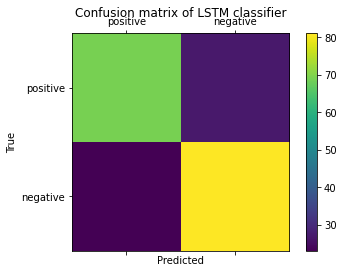

In [55]:
from sklearn.metrics import confusion_matrix
import pylab as plt
labels = ['positive','negative']
#cm = confusion_matrix(testy1[:,0], test1>0.5)
cm = confusion_matrix(Y1_test[:,0], lstm_output>0.5)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of LSTM classifier')
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#[[88 33] threshold 0.5
#[44 85]]

#[[93 28] threshold 0.75
#[64 65]]

#[[ 73  48] threshold 0.25
#[ 27 102]]

#[[ 54  33] filter 0.1-0.9 out and threshold 0.5 train size = 0.75 ,test size = 0.25
#[ 11 103]]

#[[69 27] No filter 0.1-0.9
#[23 81]]

#[[62 18] filter 0.1-0.9 train size = 0.8 ,test size = 0.2 threshold 0.5
#[19 73]]

#[[68 25] filter 0.4-0.6 train size = 0.8 ,test size = 0.2 threshold 0.5
#[22 80]]

In [26]:
test = tokenizer.texts_to_sequences(lemma_result['cleaned_review'].values)
reverse_word_map = dict(map(reversed, tokenizer.word_index.items())) # map id to all word in dic
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

my_texts = list(map(sequence_to_text, X1_test))
my_texts[13]

print(reverse_word_map)

{1: 'film', 2: 'movie', 3: 'one', 4: 'make', 5: 'see', 6: 'like', 7: 'get', 8: 'time', 9: 'watch', 10: 'go', 11: 'character', 12: 'good', 13: 'even', 14: 'think', 15: 'would', 16: 'story', 17: 'really', 18: 'well', 19: 'much', 20: 'know', 21: 'show', 22: 'look', 23: 'take', 24: 'people', 25: 'give', 26: 'first', 27: 'bad', 28: 'way', 29: 'also', 30: 'end', 31: 'great', 32: 'play', 33: 'act', 34: 'say', 35: 'come', 36: 'movies', 37: 'find', 38: 'plot', 39: 'love', 40: 'work', 41: 'want', 42: 'many', 43: 'never', 44: 'two', 45: 'little', 46: 'seem', 47: 'could', 48: 'life', 49: 'best', 50: 'try', 51: 'man', 52: 'ever', 53: 'scene', 54: 'scenes', 55: 'back', 56: 'better', 57: 'use', 58: 'still', 59: 'feel', 60: 'part', 61: 'something', 62: 'funny', 63: 'real', 64: 'new', 65: 'old', 66: 'lot', 67: 'world', 68: 'star', 69: 'interest', 70: '10', 71: 'actors', 72: 'though', 73: 'director', 74: 'leave', 75: 'actually', 76: 'thing', 77: 'nothing', 78: 'set', 79: 'pretty', 80: 'however', 81: 'gu

In [1]:
from tensorflow.keras.models import model_from_yaml

# serialize model to YAML
model_yaml = model.to_yaml()
with open("addTestTrainSize.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("addTestTrainSize.h5")
print("Saved model to disk")

NameError: name 'model' is not defined

Load Model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import random
import re
import pandas as pd

In [10]:
# loading the model
from tensorflow.keras.models import model_from_yaml
with open('./3_Save_add_TestTrain_Size/addTestTrainSize.yaml', 'r') as yaml_file:
    loaded_model_yaml = yaml_file.read()
    loaded_model = model_from_yaml(loaded_model_yaml)
    
    # load weights into new model
    loaded_model.load_weights("./3_Save_add_TestTrain_Size/addTestTrainSize.h5")

loaded_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])



In [11]:
lemma_result = pd.read_csv("../Clean/lemma_result.csv")
max_fatures = 7000 #จำนวนคำที่ใช้ใน model
tokenizer = Tokenizer(num_words=max_fatures, split=' ') 
tokenizer.fit_on_texts(lemma_result['cleaned_review'].values)
X1 = tokenizer.texts_to_sequences(lemma_result['cleaned_review'].values)
X1 = pad_sequences(X1, padding='pre')
Y1 = pd.get_dummies(lemma_result['Label']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, train_size = 0.8, random_state = 42 )

In [12]:
batch_size = 32
score,acc = loaded_model.evaluate(X1_test, Y1_test[:,0], verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

200/200 - 2s - loss: 1.0907 - accuracy: 0.7500
score: 1.09
acc: 0.75


In [13]:
import numpy as np
np.set_printoptions(suppress=True)
lstm_output= loaded_model.predict(X1_test)
print(lstm_output)
test = []
test_y = []
t1 = 0.4
t2 = 0.6

for i in range(len(lstm_output)):
    if(lstm_output[i] <t1 or lstm_output[i]>t2):
        test.append(lstm_output[i])
        test_y.append(Y1_test[i])
test1 = np.array(test)
testy1 = np.array(test_y)
print(test1.shape)
print(testy1.shape)
#print(test1)
#print(testy1)

[[0.0071913 ]
 [0.99754757]
 [0.99837875]
 [0.9990108 ]
 [0.3058723 ]
 [0.00000765]
 [0.00138833]
 [0.99658525]
 [0.9995421 ]
 [0.9020874 ]
 [0.00017783]
 [0.6334617 ]
 [0.99869484]
 [0.9605784 ]
 [0.9876993 ]
 [0.95891416]
 [0.00000314]
 [0.7984375 ]
 [0.01454883]
 [0.00643752]
 [0.00000204]
 [0.9968528 ]
 [0.9988331 ]
 [0.04735399]
 [0.99979144]
 [0.24481896]
 [0.9755476 ]
 [0.00014145]
 [0.01281525]
 [0.00007528]
 [0.99724007]
 [0.9998286 ]
 [0.62061745]
 [0.00072333]
 [0.999526  ]
 [0.00094909]
 [0.98424006]
 [0.9700449 ]
 [0.9980738 ]
 [0.00001879]
 [0.00201369]
 [0.9732415 ]
 [0.99226135]
 [0.9954602 ]
 [0.00001268]
 [0.01209067]
 [0.53452206]
 [0.00743158]
 [0.97446376]
 [0.00219014]
 [0.00050977]
 [0.9979405 ]
 [0.99945575]
 [0.9992685 ]
 [0.9934743 ]
 [0.00004228]
 [0.99990034]
 [0.08532558]
 [0.60567224]
 [0.9985707 ]
 [0.99984384]
 [0.00672532]
 [0.99836224]
 [0.00279943]
 [0.9989366 ]
 [0.9430574 ]
 [0.00070379]
 [0.00133301]
 [0.82207656]
 [0.9991308 ]
 [0.9993967 ]
 [0.00

[[68 25]
 [22 80]]


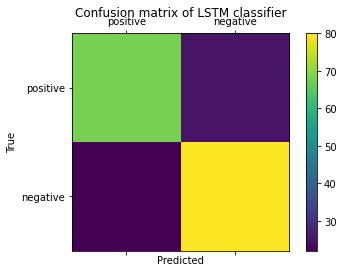

In [14]:
from sklearn.metrics import confusion_matrix
import pylab as plt
labels = ['positive','negative']
cm = confusion_matrix(testy1[:,0], test1>0.5)
#cm = confusion_matrix(Y1_test[:,0], lstm_output>0.5)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of LSTM classifier')
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
test = tokenizer.texts_to_sequences(lemma_result['cleaned_review'].values)
reverse_word_map = dict(map(reversed, tokenizer.word_index.items())) # map id to all word in dic
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

#find sentence in lemma result and see full sentence in original file
reverse_sentence = list(map(sequence_to_text, X1_test))
#print(reverse_sentence[2])

#Assemble word to sentence
sen_temp = ""
SenSave = []
for one_sentence in reverse_sentence:
    for word in one_sentence:
         if isinstance(word, str):
            sen_temp = sen_temp + " " + word
            
    SenSave.append(sen_temp)
    sen_temp = ""
            
#make 1 Dim predict result
resultSave = []
for arr_result in lstm_output:
    for result in arr_result:
        #print(result)
        resultSave.append(result)

In [16]:
print(len(SenSave))
print(len(resultSave))

200
200


In [ ]:
#Save file
data = {'lemma_review': SenSave, 'predict score': resultSave}
toFile = pd.DataFrame(data)
toFile.to_csv("./for_compare.csv", index=False)